In [12]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import fiona
from shapely.geometry import shape
import matplotlib.pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import box
import matplotlib.patches as patches
from functions import *

### Load data

In [2]:
dir_path = '../data/external/water_stations_data/water_temp'
#dir_path = '../../tfg/data/15994_4699_2024-10-31_11-54-16'
stations_meta = pd.read_excel('../data/external/Stationsliste_HydrowebSAM_EN_july2023.xlsx',skiprows=range(0,4))
stations_meta.rename(columns={'Station number': 'Stationsnummer'}, inplace=True)
stations_meta.drop_duplicates(subset = ['Stationsnummer'], inplace=True)

### Obtain georeference about stations that have data

In [3]:
stations_ds={}
new_df = pd.DataFrame()
for file in os.listdir(dir_path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir_path, file), delimiter=';', encoding='latin1', skiprows=range(0,8))
        st_number = df.Stationsnummer.unique()
        st_number_str = st_number[0]
        
        if len(st_number) > 1:
            i = 1
            while st_number_str == 'Stationsnummer' or np.isnan(float(st_number_str)):
                st_number_str = st_number[i]
                i+=1
            print('More than one station number')
        print(st_number_str)
        if st_number_str in stations_meta['Stationsnummer'].values:
            print('Station number found')
            new_df = pd.concat([new_df,stations_meta[stations_meta['Stationsnummer']==st_number_str]])
            
        d = "2013-03-01"
        df = df[df.Zeitstempel >= d]
        stations_ds[st_number_str] = df
            

2016
Station number found
2347
Station number found
2269
Station number found
2033
Station number found
2070
Station number found
2130
Station number found
2609
Station number found
2410
Station number found
2174
Station number found
2018
Station number found
2029
Station number found
2276
Station number found
2481
Station number found
2044
Station number found
2091
Station number found
2019
Station number found
2135
Station number found
2392
Station number found
2635
Station number found
2143
Station number found
2243
Station number found
2085
Station number found
2084
Station number found
2112
Station number found
2232
Station number found
2011
Station number found
2327
Station number found
2009
Station number found
2623
Station number found
2106
Station number found
2150
Station number found
2343
Station number found
2179
Station number found
2617
Station number found
2068
Station number found
2282
Station number found
2351
Station number found
2369
Station number found
2433
Station

In [4]:
stations_ds[2161]

,Stationsname,Stationsnummer,Parameter,Zeitreihe,Parametereinheit,Gewässer,Zeitstempel,Zeitpunkt_des_Auftretens,Wert,Freigabestatus
2,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2013-03-01 00:00:00,NaN,0.96,"Freigegeben, validierte Daten"
3,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2013-04-01 00:00:00,NaN,1.56,"Freigegeben, validierte Daten"
4,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2013-05-01 00:00:00,NaN,1.31,"Freigegeben, validierte Daten"
5,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2013-06-01 00:00:00,NaN,1.31,"Freigegeben, validierte Daten"
6,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2013-07-01 00:00:00,NaN,1.25,"Freigegeben, validierte Daten"
...,...,...,...,...,...,...,...,...,...,...
136,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2024-05-01 00:00:00,NaN,1.79,"Freigegeben, geprüfte Daten"
137,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2024-06-01 00:00:00,NaN,1.56,"Freigegeben, geprüfte Daten"
138,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2024-07-01 00:00:00,NaN,Lücke,"Nicht freigegeben, Rohdaten"
139,Blatten bei Naters,2161,Wassertemperatur,Monatsmittel,°C,Massa,2024-08-01 00:00:00,NaN,223.36,"Nicht freigegeben, Rohdaten"


### Obtain grid cells sorrounding every station

In [5]:
crs_original = "EPSG:2056"  # o usa "EPSG:21781" si las coordenadas están en LV03

# Convertir el DataFrame de pandas a un GeoDataFrame de geopandas
gdf = gpd.GeoDataFrame(
    new_df,
    geometry=gpd.points_from_xy(new_df["X-Coordinate"], new_df["Y-Coordinate"]),
    crs=crs_original
)

# Proyectar al CRS deseado, por ejemplo WGS84 (EPSG:4326)
gdf = gdf.to_crs("EPSG:4326")

<Axes: >

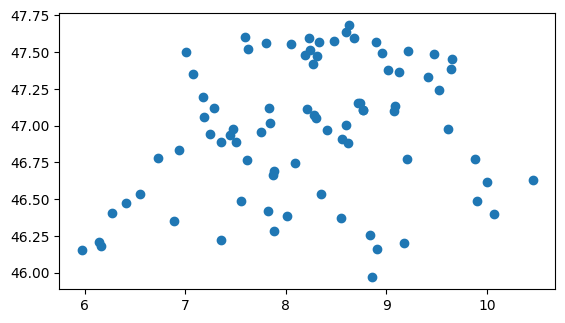

In [36]:
gdf.plot()

In [56]:
gdf2

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3993N2566,3993000,2566000,"POLYGON ((2470158.694 1109319.67, 2470125.452 ..."
1,1kmE3993N2567,3993000,2567000,"POLYGON ((2470125.452 1110320.065, 2470092.204..."
2,1kmE3993N2568,3993000,2568000,"POLYGON ((2470092.204 1111320.453, 2470058.95 ..."
3,1kmE3993N2569,3993000,2569000,"POLYGON ((2470058.95 1112320.836, 2470025.691 ..."
4,1kmE3993N2570,3993000,2570000,"POLYGON ((2470025.691 1113321.212, 2469992.426..."
...,...,...,...,...
62097,1kmE4373N2647,4373000,2647000,"POLYGON ((2846932.386 1203244.266, 2846899.886..."
62098,1kmE4373N2648,4373000,2648000,"POLYGON ((2846899.886 1204244.616, 2846867.387..."
62099,1kmE4373N2649,4373000,2649000,"POLYGON ((2846867.387 1205244.963, 2846834.889..."
62100,1kmE4373N2650,4373000,2650000,"POLYGON ((2846834.889 1206245.308, 2846802.392..."


EPSG:2056


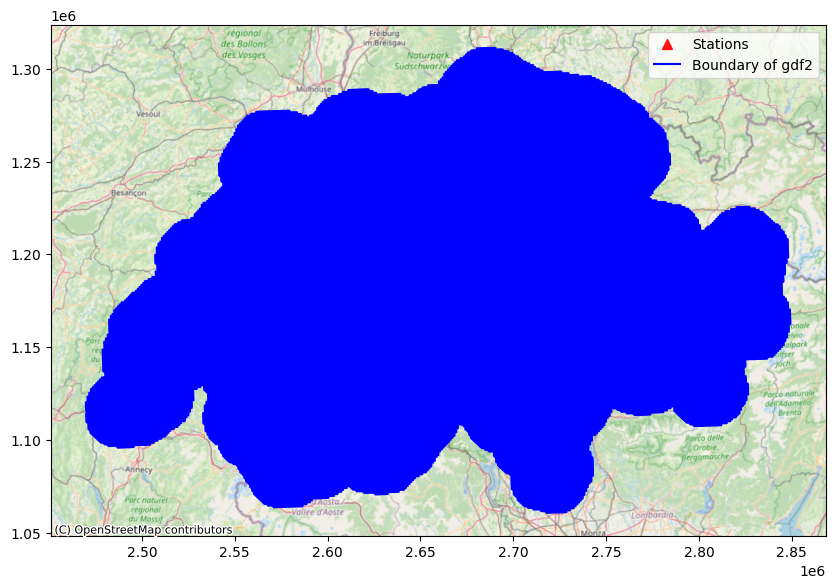

In [63]:
import contextily as ctx
# Leer el shapefile y transformar a EPSG:4326
gdf2 = gpd.read_file('../data/external/shp/Switzerland_shapefile/ch_1km.shp')
gdf2 = gdf2.to_crs("EPSG:2056")
print(gdf.crs)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Ploteo de los puntos de `gdf`
gdf.plot(ax=ax, color="red", marker="^", markersize=50, alpha=0.9, label="Stations")

gdf2.boundary.plot(ax=ax, edgecolor = 'blue', label="Boundary of gdf2")


# Añadir mapa base (opcional)
ctx.add_basemap(ax, crs=gdf2.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar la leyenda y el gráfico
ax.legend()
plt.show()

### Create a shp for each cell

In [15]:
water_ds = pd.DataFrame(index = stations_ds[2161].Zeitstempel,columns = range(1,len(gdf)+1))

In [24]:
water_ds

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
Zeitstempel,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.76,1.05,2.72,2.91,3.61,5.86,3.23,7.46,6.24,5.59,...,5.96,8.20,4.04,6.69,6.04,6.06,5.48,3.83,4.64,0.96
2013-04-01 00:00:00,8.16,3.23,3.62,5.43,5.91,8.54,5.20,8.94,8.94,8.33,...,8.02,9.92,5.92,9.93,8.77,8.77,8.22,8.19,8.90,1.56
2013-05-01 00:00:00,12.06,5.38,4.49,6.83,8.68,12.21,8.49,9.46,10.16,11.65,...,8.53,10.93,6.86,13.71,10.15,12.35,10.14,10.75,11.26,1.31
2013-06-01 00:00:00,15.15,9.05,5.01,8.56,12.00,15.21,12.85,10.42,13.67,15.12,...,10.90,12.93,8.49,17.17,14.04,15.36,13.41,13.63,15.18,1.31
2013-07-01 00:00:00,19.52,12.63,6.34,10.80,15.42,21.28,17.35,11.98,19.61,20.50,...,13.75,16.97,10.80,20.67,20.99,21.30,17.45,17.22,20.13,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01 00:00:00,13.94,6.03,4.81,7.26,10.67,13.85,11.10,10.58,12.20,13.40,...,10.36,12.10,7.63,15.62,12.29,13.95,11.97,12.41,14.02,1.79
2024-06-01 00:00:00,16.58,9.45,5.38,8.63,13.05,17.00,13.57,11.62,15.24,16.79,...,12.24,13.55,9.03,18.39,15.95,17.04,14.46,14.65,16.51,1.56
2024-07-01 00:00:00,19.75,12.10,6.82,10.47,15.52,20.68,16.94,12.39,18.90,20.38,...,14.30,15.95,10.74,20.82,19.92,20.67,17.49,17.22,19.97,Lücke


In [17]:
# Change the CRS to a projected coordinate system (e.g., UTM appropriate for your region)
gdf = gdf.to_crs("EPSG:32633")  # Make sure to use the correct CRS for your region

# Define the buffer size in meters (10x10 km = 5000 m in each direction from the center point)
buffer_size = 6400

# Create a folder to store the shapefiles if it doesn't exist
output_folder = "../data/external/shp/cells"
os.makedirs(output_folder, exist_ok=True)

cell_data = pd.DataFrame(columns=["Cell", "Latitude", "Longitude"])

c=1
# Iterate over each point and create a 10x10 km cell, saving it as an individual shapefile
for idx, point in gdf.iterrows():
    # Create the square cell
    x, y = point.geometry.x, point.geometry.y
    square = box(x - buffer_size, y - buffer_size, x + buffer_size, y + buffer_size)
    
    # Create a new GeoDataFrame for the cell
    cell_gdf = gpd.GeoDataFrame(index=[0], crs=gdf.crs, geometry=[square])
    
    # Define the filename for each cell, using the index or any relevant attribute
    cell_filename = f"{output_folder}/cell_{c}.shp"
    cell_gdf = cell_gdf.to_crs("EPSG:2056")
    
    # Save the individual cell as a shapefile
    cell_gdf.to_file(cell_filename, driver="ESRI Shapefile")
    try:
        station_number = point.Stationsnummer
        station_data = stations_ds[station_number]
        water_ds[c] = list(station_data.Wert.values)

        latitude = point['X-Coordinate']  # Taking the first value if multiple exist
        longitude = point['Y-Coordinate']  # Taking the first value if multiple exist

        # Append data to cell_data DataFrame
        cell_data = pd.concat([cell_data,pd.DataFrame({"Cell": [c], "Latitude": [latitude], "Longitude": [longitude]})], ignore_index=True)
    
    except Exception as e:
        print(e)
        print(station_number,c, len(list(station_data.Wert.values)))
    
    c+=1
    

print("Individual shapefiles created in the 'cells_10x10km' folder.")


/tmp/ipykernel_3800089/1644213770.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cell_data = pd.concat([cell_data,pd.DataFrame({"Cell": [c], "Latitude": [latitude], "Longitude": [longitude]})], ignore_index=True)


Length of values (138) does not match length of index (139)
2356 70 138
Individual shapefiles created in the 'cells_10x10km' folder.


In [25]:
dirr='../data/raw/wt'
os.makedirs(dirr,exist_ok=True)
water_ds.to_csv(f'{dirr}/water_temp.csv',index=True)
cell_data.to_csv(f'{dirr}/cell_coordinates_oficial.csv',index=False)
pd.read_csv(f'{dirr}/water_temp.csv', index_col=0)

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
Zeitstempel,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.76,1.05,2.72,2.91,3.61,5.86,3.23,7.46,6.24,5.59,...,5.96,8.20,4.04,6.69,6.04,6.06,5.48,3.83,4.64,0.96
2013-04-01 00:00:00,8.16,3.23,3.62,5.43,5.91,8.54,5.20,8.94,8.94,8.33,...,8.02,9.92,5.92,9.93,8.77,8.77,8.22,8.19,8.90,1.56
2013-05-01 00:00:00,12.06,5.38,4.49,6.83,8.68,12.21,8.49,9.46,10.16,11.65,...,8.53,10.93,6.86,13.71,10.15,12.35,10.14,10.75,11.26,1.31
2013-06-01 00:00:00,15.15,9.05,5.01,8.56,12.00,15.21,12.85,10.42,13.67,15.12,...,10.90,12.93,8.49,17.17,14.04,15.36,13.41,13.63,15.18,1.31
2013-07-01 00:00:00,19.52,12.63,6.34,10.80,15.42,21.28,17.35,11.98,19.61,20.50,...,13.75,16.97,10.80,20.67,20.99,21.30,17.45,17.22,20.13,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01 00:00:00,13.94,6.03,4.81,7.26,10.67,13.85,11.10,10.58,12.20,13.40,...,10.36,12.10,7.63,15.62,12.29,13.95,11.97,12.41,14.02,1.79
2024-06-01 00:00:00,16.58,9.45,5.38,8.63,13.05,17.00,13.57,11.62,15.24,16.79,...,12.24,13.55,9.03,18.39,15.95,17.04,14.46,14.65,16.51,1.56
2024-07-01 00:00:00,19.75,12.10,6.82,10.47,15.52,20.68,16.94,12.39,18.90,20.38,...,14.30,15.95,10.74,20.82,19.92,20.67,17.49,17.22,19.97,Lücke


### Check if river and cell shp are the same

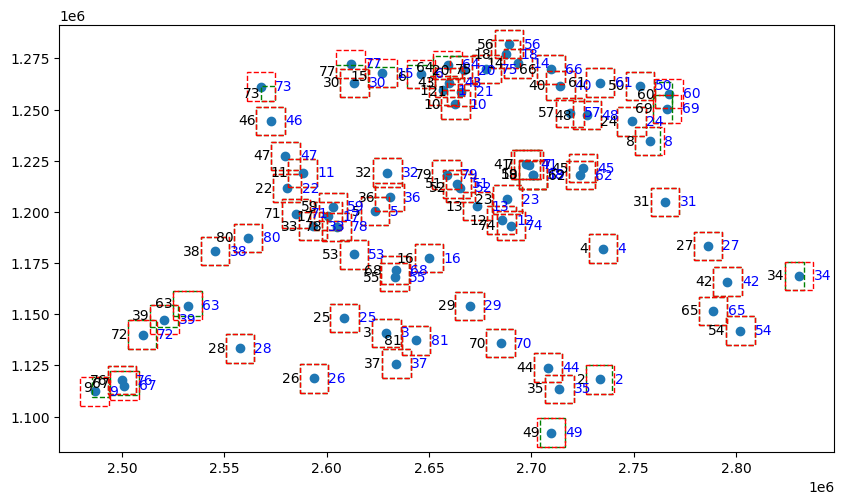

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf = gdf.to_crs("EPSG:2056")
gdf.plot(ax=ax)
folder = '../data/external/shp/river_cells_oficial'
folder_cells= '../data/external/shp/cells'#_10x10km'
for i in range(1, 82):
    try:
        # Cargar el shapefile de la celda expandida
        cell = os.path.join(folder, f'station_cell_{i}.shp')
        cell_gdf = gpd.read_file(cell)
        expanded_bbox = cell_gdf.total_bounds
    
        # Dibujar la bounding box expandida en el gráfico
        expanded_rect = patches.Rectangle(
            (expanded_bbox[0], expanded_bbox[1]),
            expanded_bbox[2] - expanded_bbox[0],
            expanded_bbox[3] - expanded_bbox[1],
            linewidth=1,
            edgecolor="green",
            facecolor="none",
            linestyle="--"
        )
        ax.add_patch(expanded_rect)
        text_x = expanded_bbox[0] - 100  # Ajuste de posición hacia la derecha
        text_y = (expanded_bbox[1] + expanded_bbox[3]) / 2 
        ax.text(text_x, text_y, str(i), color="black", fontsize=10, ha="right", va="center")
    
    
        cell = os.path.join(folder_cells, f'cell_{i}.shp')
        cell_gdf = gpd.read_file(cell)
        expanded_bbox = cell_gdf.total_bounds
    
        # Dibujar la bounding box expandida en el gráfico
        expanded_rect = patches.Rectangle(
            (expanded_bbox[0], expanded_bbox[1]),
            expanded_bbox[2] - expanded_bbox[0],
            expanded_bbox[3] - expanded_bbox[1],
            linewidth=1,
            edgecolor="red",
            facecolor="none",
            linestyle="--"
        )
        text_x = expanded_bbox[2] + 100  # Ajuste de posición hacia la derecha
        text_y = (expanded_bbox[1] + expanded_bbox[3]) / 2 
        ax.text(text_x, text_y, str(i), color="blue", fontsize=10, ha="left", va="center")
    
        ax.add_patch(expanded_rect)
    except:
        pass

### Other visualizations

In [23]:
dir_p='../data/preprocessed/lst'
paths=[]
for subdir, dirs,files in os.walk(dir_p):
    if subdir != dir_p and not subdir.endswith('masked') and not subdir.endswith('.ipynb_checkpoints'): 
        paths.append(subdir)

list_rgb = [True]*len(paths)
d, t = load_data(paths,128,list_rgb)
len(d)

81

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf = gdf.to_crs("EPSG:2056")
gdf.plot(ax=ax)
folder = '../data/external/shp/river_cells_oficial'
folder_cells= '../data/external/shp/cells'#_10x10km'
for i in range(1, 82):
    try:
        # Cargar el shapefile de la celda expandida
        cell = os.path.join(folder, f'station_cell_{i}.shp')
        cell_gdf = gpd.read_file(cell)
        expanded_bbox = cell_gdf.total_bounds
    
        # Dibujar la bounding box expandida en el gráfico
        expanded_rect = patches.Rectangle(
            (expanded_bbox[0], expanded_bbox[1]),
            expanded_bbox[2] - expanded_bbox[0],
            expanded_bbox[3] - expanded_bbox[1],
            linewidth=1,
            edgecolor="green",
            facecolor="none",
            linestyle="--"
        )
        ax.add_patch(expanded_rect)
        text_x = expanded_bbox[0] - 100  # Ajuste de posición hacia la derecha
        text_y = (expanded_bbox[1] + expanded_bbox[3]) / 2 
        ax.text(text_x, text_y, str(i), color="black", fontsize=10, ha="right", va="center")
    
    
        cell = os.path.join(folder_cells, f'cell_{i}.shp')
        cell_gdf = gpd.read_file(cell)
        expanded_bbox = cell_gdf.total_bounds
    
        # Dibujar la bounding box expandida en el gráfico
        expanded_rect = patches.Rectangle(
            (expanded_bbox[0], expanded_bbox[1]),
            expanded_bbox[2] - expanded_bbox[0],
            expanded_bbox[3] - expanded_bbox[1],
            linewidth=1,
            edgecolor="red",
            facecolor="none",
            linestyle="--"
        )
        text_x = expanded_bbox[2] + 100  # Ajuste de posición hacia la derecha
        text_y = (expanded_bbox[1] + expanded_bbox[3]) / 2 
        ax.text(text_x, text_y, str(i), color="blue", fontsize=10, ha="left", va="center")
    
        ax.add_patch(expanded_rect)
    except:
        pass

In [ ]:
a=gpd.read_file(os.path.join(output_folder,'cell_1.shp'))
a.plot()
a.crs

#### Plot all cells

In [ ]:
gdf = gdf.to_crs("EPSG:32633")
buffer_size = 5000  # 10x10 km significa 5 km de radio en cada dirección desde el centro

# Función para crear una celda cuadrada alrededor de cada punto
def create_square(point, size):
    x, y = point.x, point.y
    return box(x - size, y - size, x + size, y + size)

# Aplicamos la función a cada punto en el GeoDataFrame
gdf['geometry'] = gdf.geometry.apply(lambda point: create_square(point, buffer_size))
gdf = gdf.to_crs("EPSG:2056")
gdf.plot(color='none')

### Comparison to old cells

In [ ]:
crs_original = "EPSG:2056"  # o usa "EPSG:21781" si las coordenadas están en LV03

# Convertir el DataFrame de pandas a un GeoDataFrame de geopandas
gdf = gpd.GeoDataFrame(
    new_df,
    geometry=gpd.points_from_xy(new_df["X-Coordinate"], new_df["Y-Coordinate"]),
    crs=crs_original
)

# Proyectar al CRS deseado, por ejemplo WGS84 (EPSG:4326)
gdf = gdf.to_crs("EPSG:4326")

In [ ]:
gdf2 = gpd.read_file('../data/external/shp/Switzerland_shapefile')
gdf2 = gdf2.to_crs("EPSG:4326")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf2.plot(ax=ax, facecolor="none", edgecolor="green", linewidth=1, label='Preprocessed Cells')
gdf.plot(ax=ax)
